In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Parsing the JSON to dictionary

In [3]:
pupils = json.load(open('pupils.json', 'r'))    # result will be a python dictionary

#jeder entry ist ein schüler: zB data[0]
len(pupils)
#2214

2715

In [4]:
pupils[0].keys()
#['_id', 'classId', 'userId', 'companyId', 'partner', 'lang', 'username', 'shownTaskSeries', 'currentTaskSeries', 'solvedTaskSeries', 'revisions', 'workspaceContent', 'chat', 'assists', 'experience', 'lastNotificationUpdate']

dict_keys(['_id', 'classId', 'userId', 'companyId', 'partner', 'lang', 'username', 'shownTaskSeries', 'currentTaskSeries', 'solvedTaskSeries', 'revisions', 'workspaceContent', 'chat', 'assists', 'experience', 'lastNotificationUpdate'])

* _id
* classId
* userId
* companyId
* partner
* lang
* username
* shownTaskSeries
* currentTaskSeries
* solvedTaskSeries
    * taskSeriesId
    * currentSections
        * currentSubSections
            * duration (in sekunden)
            * exercise
                * state:
                    * text bei freitext in p tags
                    * 0, 1, 0... bei survey
                    * false, true, false bei MC
                * submitted: true
                * subType “freetext”, “survey”, “multipleChoice”
                * history: wahrscheinlich alte versionen bei freetext
                * falseAttempts bei MC: bool array mit erster lösung
                * evaluation: (bool) bei freetext und MC
                    * “false” bei mc wenn falsche lösung und keine tipps → direkt musterlösung
                    * “correct” bei mc wenn richtige lösung
                    * “pending” bei freitext, wenn lehrer noch nicht bewertet
                * rating: bei freetext
    * revisions
        * (id, taskseriesid, was um die section zu finden)
        * accepted: false
        * …
    * chat
    * assists
    * experience

# EDA

## Alle tasks für einen Schüler checken

[7, 10, 7, 10, 15, 5, 4, 5, 3, 1, 3, 23, 10, 8, 11, 1, 6, 5, 4, 1, 9, 4, 2, 38, 55, 5, 16, 28, 24, 2, 7, 13, 24, 13, 2, 11, 11, 5, 5, 4, 26, 17, 24, 29, 2, 16, 4, 12, 14, 14, 3, 17, 24, 8, 1, 4, 16, 16, 4, 2, 16, 33, 34]
Minimal time: 1
Maximal time: 55
Average time in sec: 11.952380952380953


(array([4., 5., 3., 7., 6., 1., 3., 2., 1., 3., 3., 1., 2., 2., 1., 5., 2.,
        0., 0., 0., 0., 0., 1., 4., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.]),
 array([ 1.        ,  1.98181818,  2.96363636,  3.94545455,  4.92727273,
         5.90909091,  6.89090909,  7.87272727,  8.85454545,  9.83636364,
        10.81818182, 11.8       , 12.78181818, 13.76363636, 14.74545455,
        15.72727273, 16.70909091, 17.69090909, 18.67272727, 19.65454545,
        20.63636364, 21.61818182, 22.6       , 23.58181818, 24.56363636,
        25.54545455, 26.52727273, 27.50909091, 28.49090909, 29.47272727,
        30.45454545, 31.43636364, 32.41818182, 33.4       , 34.38181818,
        35.36363636, 36.34545455, 37.32727273, 38.30909091, 39.29090909,
        40.27272727, 41.25454545, 42.23636364, 43.21818182, 44.2       ,
        45.18181818, 46.16363636, 47.14545455, 48.12727273, 49.10909091,
        50.09090

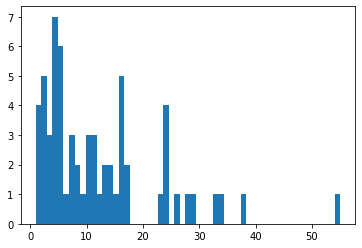

In [5]:
#["solvedTaskSeries"]#["currentSections"]#["currentSubSections"]
len(pupils[0]["solvedTaskSeries"]) #24 tasks gelöst
pupils[0]["solvedTaskSeries"]

durations = []

for task in range(len(pupils[0]["solvedTaskSeries"])): #alle tasks für einen schüler
    #print("task " + str(task))
    #print(data[0]["solvedTaskSeries"][task])
    for section in pupils[0]["solvedTaskSeries"][task]["currentSections"]: #für diese tasks, alle sections
        #print("section ")
        #print(type(section)) --> dict
        #print(section["currentSubSections"][0])
        for subsection in pupils[0]["solvedTaskSeries"][task]["currentSections"][0]["currentSubSections"]:
            #print("subsection")
            #print(subsection["duration"])
            durations.append(subsection["duration"])

            
#durations:
print(durations)
print("Minimal time: " + str(min(durations)))
print("Maximal time: " + str(max(durations)))
print("Average time in sec: " + str(sum(durations)/len(durations)))       
plt.hist(durations, bins=max(durations))

## Nach Aufgabentyp

In [47]:
tasktypes = ["blockly", "multipleChoice", "freetext", "survey", "inputField", "surveySlider"]

durations = { tasktype: {"summe": 0, "count": 0, "avrg": 0} for tasktype in tasktypes}

missing_tasktype = []

#for pupilnumber in range(len(pupils[0:5])): #für die ersten 5 schüler
for pupilnumber in range(len(pupils)): #für jeden schüler
    for tasknumber in range(len(pupils[pupilnumber]["solvedTaskSeries"])): #für jede seiner tasks
        #print(pupilnumber, tasknumber)  --> macht er nur für einen? oder haben die anderen einfach keine?
        for sectionnumber in range(len(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"])): #für diese tasks, alle sections
            for subsectionnumber in range(len(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"])):
                if("exercise" in pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber].keys()): #nicht alle aufgaben haben eine exercise
                    if pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "blockly":
                        durations["blockly"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["blockly"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "multipleChoice":
                        durations["multipleChoice"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["multipleChoice"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "freetext":
                        durations["freetext"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["freetext"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "survey":
                        durations["survey"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["survey"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "inputField":
                        durations["inputField"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["inputField"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "surveySlider":
                        durations["surveySlider"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["surveySlider"]["count"] += 1
                    else:
                        if pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] not in missing_tasktype:
                            missing_tasktype.append(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"])

#print(missing_tasktype)

for tasktype in durations:
    durations[tasktype]["avrg"] = durations[tasktype]["summe"]/durations[tasktype]["count"]
    
#print(durations)

#avrg_durations = [durations[tasktype]["avrg"] for tasktype in durations]
avrg_durations = {tasktype: durations[tasktype]["avrg"] for tasktype in durations}
print(avrg_durations)

{'blockly': 213.6818086665271, 'multipleChoice': 76.4256860286948, 'freetext': 277.321554770318, 'survey': 52.75100942126514, 'inputField': 53.24590163934426, 'surveySlider': 21.224137931034484}


([<matplotlib.axis.XTick at 0x7f8b17b5ded0>,
 [Text(0, 0, 'blockly'),
  Text(1, 0, 'multipleChoice'),
  Text(2, 0, 'freetext'),
  Text(3, 0, 'survey'),
  Text(4, 0, 'inputField'),
  Text(5, 0, 'surveySlider')])

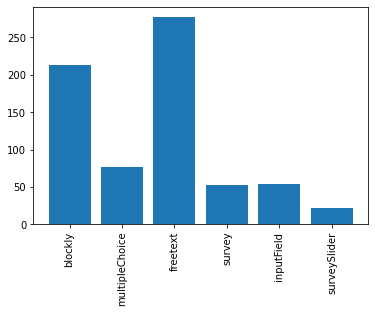

In [50]:
plt.bar(range(len(avrg_durations)), list(avrg_durations.values()), align='center')
plt.xticks(range(len(avrg_durations)), list(avrg_durations.keys()), rotation=90)

## Nur für das KI Paket

In [65]:
# checken, ob taskSeriesId 
KI_taskseries_ids = ["AI-1-v2", "AI-2-v2", "AI-3-v2", "AI-4-v2", "ML-1", "ML-2", "ML-3", "Classification-1", "Clustering-1", "Classification-2", "Clustering-2", "LimitsML", "EvalML", "Impact-1", "Impact-2", "Impact-3", "Impact-4", "AIClosing"]


for pupilnumber in range(len(pupils)): #für jeden schüler
    for tasknumber in range(len(pupils[pupilnumber]["solvedTaskSeries"])): #für jede seiner tasks
        if(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["taskSeriesId"] in KI_taskseries_ids):
            for sectionnumber in range(len(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"])): #für diese tasks, alle sections
                for subsectionnumber in range(len(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"])):
                    if("exercise" in pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber].keys()):
                        print(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["taskSeriesId"], pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"])

AI-1-v2 {'state': 18, 'submitted': True, 'history': [], 'subType': 'surveySlider'}
AI-1-v2 {'state': '<p>Test</p>', 'submitted': True, 'history': [], 'subType': 'freetext', 'evaluation': 'pending', 'rating': None}
AI-1-v2 {'state': [1, 0, 0, 0, 0], 'submitted': True, 'history': [], 'subType': 'survey'}
AI-1-v2 {'state': 71, 'submitted': True, 'history': [], 'subType': 'surveySlider'}
AI-1-v2 {'state': '<p>qwert</p>', 'submitted': True, 'history': [], 'subType': 'freetext', 'evaluation': 'pending', 'rating': None}
AI-1-v2 {'state': [0, 0, 0, 0], 'submitted': True, 'history': [], 'subType': 'survey'}
AI-2-v2 {'state': [True, True, False, True], 'submitted': True, 'history': [], 'subType': 'multipleChoice', 'evaluation': 'false', 'hintsTaken': 1, 'falseAttempts': [[False, False, False, False], [False, False, False, False]]}
AI-1-v2 {'state': 92, 'submitted': True, 'history': [], 'subType': 'surveySlider'}
AI-1-v2 {'state': '<p>Künstliche Intelligenz ist ein Algorithmus, der immer weiter d

Clustering-1 {'state': [False, False, True, True], 'submitted': True, 'history': [], 'subType': 'multipleChoice', 'evaluation': 'false', 'hintsTaken': 1, 'falseAttempts': [[True, False, False, True]]}
Clustering-1 {'state': [True, False], 'submitted': True, 'history': [], 'subType': 'multipleChoice', 'evaluation': 'correct'}
Clustering-1 {'state': '8', 'submitted': True, 'history': [], 'subType': 'inputField', 'evaluation': 'correct'}
Clustering-1 {'state': '7', 'submitted': True, 'history': [], 'subType': 'inputField', 'evaluation': 'false', 'hintsTaken': 1, 'falseAttempts': ['8', '8']}
Clustering-2 {'state': '<p>Ich denke die nummer 1, weil mehr mädchen benutzen make up und interessieren sich dafür und sie macht ja auch beauty und dafür benutzt sie make up und deswegen könnte sie es am meisten machen</p>', 'submitted': True, 'history': [], 'subType': 'freetext', 'evaluation': 'pending', 'rating': None}
AI-1-v2 {'state': 84, 'submitted': True, 'history': [], 'subType': 'surveySlider'}

# Grundlegend:
* ist das eine an der stelle 0 richtig? will ich mit section weiter machen oder durchloopen?


# Was spannend wäre

* für alle schüler die average durations insgesamt
* für jede aufgabe die average durations
* schwerste / leichteste aufgaben (nach duration)
* texte checken
* hilfeanfragen
* chat

In [28]:
#data[0]["solvedTaskSeries"][0]["currentSections"]#["currentSubSections"]
data[0]["solvedTaskSeries"][0]["currentSections"][0]["currentSubSections"]

[{'duration': 7,
  'exercise': {'state': {'code': "moveForward('To}55mI6)_S@clnS`X-A');\nmoveForward('cN6xgVR3:EAoi_G*O+s%');\nmoveForward('4Fpi1i6(r(wn%5JKDZxK');\nmoveForward('r0,nkc*$uzIf%t,5^=LT');\n",
    'workspace': '<xml xmlns="https://developers.google.com/blockly/xml">\n  <block type="mainBlock" id="initialMainBlock" deletable="false" movable="false" editable="false" x="38" y="38">\n    <statement name="EXECUTE">\n      <block type="pp_Maze_moveForward" id="To}55mI6)_S@clnS`X-A">\n        <next>\n          <block type="pp_Maze_moveForward" id="cN6xgVR3:EAoi_G*O+s%">\n            <next>\n              <block type="pp_Maze_moveForward" id="4Fpi1i6(r(wn%5JKDZxK">\n                <next>\n                  <block type="pp_Maze_moveForward" id="r0,nkc*$uzIf%t,5^=LT"></block>\n                </next>\n              </block>\n            </next>\n          </block>\n        </next>\n      </block>\n    </statement>\n  </block>\n</xml>'},
   'submitted': True,
   'history': [],
   's

In [ ]:
# possible to sort keys: json.dumps(x, indent=4, sort_keys=True)